In [739]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# import numpy as np 
# np.random.seed(100)

In [740]:
file_path = "crypto_data.csv"

In [741]:
df = pd.read_csv(file_path, index_col = 0)

In [742]:
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [743]:
df.shape

(1252, 6)

In [744]:
df_trade = df[(df['IsTrading']==True)]

In [745]:
df_trade.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [746]:
df_trade.shape

(1144, 6)

In [747]:
df_trade.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [748]:
df_trade = df.dropna()

In [749]:
df_trade

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [750]:
df_trade = df_trade.drop(['IsTrading'], axis = 1)

In [751]:
df_trade

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [752]:
df_trade.shape

(744, 5)

In [753]:
df_trade = df_trade.drop(['CoinName'], axis = 1)

In [754]:
df_trade.shape

(744, 4)

In [755]:
df_trade = df_trade.loc[df_trade['TotalCoinsMined']>0]

In [756]:
df_trade

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000
XBC,Scrypt,PoS,1.283270e+05,1000000


In [757]:
df_trade_dummies = pd.get_dummies(df_trade, columns=['Algorithm', 'ProofType'])

In [758]:
df_trade_dummies
#Rows remained the same but columns jump from 4 to 101

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [759]:
scaler = StandardScaler()

In [760]:
df_trade_scaled = scaler.fit_transform(df_trade_dummies)

In [761]:
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(df_trade_scaled)

In [762]:
pca_data

array([[-3.25873467e-01,  1.13989379e+00, -5.58793131e-01, ...,
         3.49955360e-18,  8.19193400e-15, -6.80805939e-15],
       [-3.08532273e-01,  1.14012328e+00, -5.59207977e-01, ...,
         7.34088285e-16,  7.25399543e-15, -6.85920301e-15],
       [ 2.42049045e+00,  1.71779871e+00, -6.35945634e-01, ...,
        -8.24612059e-14, -2.40885484e-13,  1.25544180e-13],
       ...,
       [-1.50690337e-01, -2.07676698e+00,  3.80761010e-01, ...,
        -2.81091612e-15, -2.88302732e-15, -1.80878304e-15],
       [-2.79988707e-01,  7.92128764e-01, -2.56735735e-01, ...,
        -3.54383537e-15, -2.85798752e-15,  3.13665156e-15],
       [-3.24864062e-01,  1.13985756e+00, -5.58810407e-01, ...,
         8.34948661e-16,  7.68130085e-15, -6.51818129e-15]])

In [763]:
df_pca90 = pd.DataFrame(data=pca_data)
#df_pca90
#Columns were further reduced from 101 to 77 using n_components=0.90
df_pca90.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.325873,1.139894,-0.558793,0.001330,3.111766e-14,-6.052073e-14,5.498984e-14,-0.013586,-1.228595,-0.061216,...,-2.413933e-15,6.892502e-16,3.540052e-15,-2.550836e-15,-4.998558e-15,3.177409e-15,-3.281038e-15,3.499554e-18,8.191934e-15,-6.808059e-15
1,-0.308532,1.140123,-0.559208,0.001318,2.901741e-14,-6.052264e-14,5.618441e-14,-0.014233,-1.231987,-0.064990,...,-2.712217e-15,1.687095e-15,3.114421e-15,-8.411982e-16,-5.801328e-15,1.271059e-15,-8.835957e-16,7.340883e-16,7.253995e-15,-6.859203e-15
2,2.420490,1.717799,-0.635946,0.004728,5.720873e-14,-9.936894e-14,7.608839e-14,-0.064570,-1.575150,-0.732407,...,6.165598e-14,1.864107e-14,-2.688368e-14,6.416451e-14,8.321631e-14,1.364877e-13,-2.942774e-14,-8.246121e-14,-2.408855e-13,1.255442e-13
3,-0.138908,-1.349133,0.166846,-0.001204,-1.316478e-14,2.291578e-14,-1.769666e-14,0.001798,0.181201,0.226610,...,3.134448e-15,2.930153e-15,4.718286e-15,2.024018e-15,-6.838517e-15,-1.808731e-15,-5.762794e-15,-8.719677e-15,-4.467087e-14,1.701081e-14
4,-0.135897,-2.110498,0.357371,-0.001688,-3.031797e-14,4.236947e-14,-3.692198e-14,0.033395,0.359324,0.193160,...,-3.167196e-14,6.932058e-14,1.912010e-13,-1.090344e-13,-1.789884e-13,-1.633151e-13,-1.879941e-14,1.095260e-13,-7.390056e-14,-1.278700e-14


In [764]:
df_pca90.shape

(577, 77)

In [765]:
pca.explained_variance_ratio_

array([0.02708105, 0.02067072, 0.01990277, 0.01983637, 0.01983636,
       0.01983636, 0.01983636, 0.01981545, 0.01793603, 0.01699956,
       0.01685121, 0.015789  , 0.01503468, 0.01428098, 0.01398908,
       0.01370283, 0.0120177 , 0.0116892 , 0.01068992, 0.01038572,
       0.01017478, 0.01011304, 0.01010378, 0.0100661 , 0.0100465 ,
       0.01003429, 0.01000455, 0.00998757, 0.00998672, 0.00998093,
       0.00997749, 0.00997116, 0.00997011, 0.00997011, 0.00996863,
       0.00995964, 0.00995322, 0.00994947, 0.00994517, 0.00994236,
       0.00993881, 0.00993566, 0.00993543, 0.00993543, 0.00993543,
       0.0099346 , 0.00993005, 0.00992887, 0.00992531, 0.00991925,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991

In [766]:
# tsne = TSNE(learning_rate=150)
# tsne = TSNE(learning_rate=100)
# tsne = TSNE(learning_rate=50)
tsne = TSNE(learning_rate=25)

In [767]:
tsne_f = tsne.fit_transform(df_pca90)

In [768]:
tsne_f.shape
#columns went from 77 to 2 due to fit_transform

(577, 2)

In [769]:
tsne_f

array([[  9.068744  , -11.9939575 ],
       [  8.220214  , -19.1       ],
       [ 11.500654  , -27.683615  ],
       ...,
       [-20.644802  ,  -0.16318874],
       [  3.70131   ,  13.886532  ],
       [ 11.589927  , -16.600117  ]], dtype=float32)

In [770]:
df_pca90['x'] = tsne_f[:,0]

df_pca90['y'] = tsne_f[:,1]

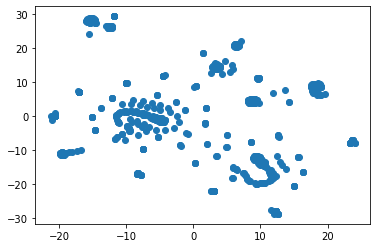

In [771]:
plt.scatter(df_pca90['x'], df_pca90['y'])
plt.show()


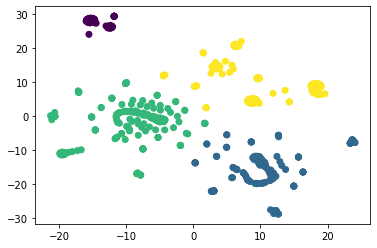

In [772]:
plt.scatter(df_pca90['x'], df_pca90['y'], c= model.labels_)
plt.show()

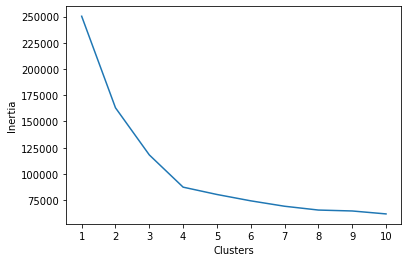

In [773]:
inertia = []
k=[1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca90)
    inertia.append(km.inertia_)

elbow = {"k":k, "inertia": inertia}
elbowdf = pd.DataFrame(elbow)
plt.plot(elbowdf['k'],elbowdf['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [774]:
#bend occurs at 4 clusters on graph but could be argued that there is a bend at 3 as well 
elbowdf

,k,inertia
0,1,250336.616079
1,2,163053.353412
2,3,118142.852161
3,4,87402.617832
4,5,80420.455564
5,6,74359.957788
6,7,69201.665860
7,8,65573.247897
8,9,64694.742184
9,10,61889.762928


In [775]:
#Based on the scatter graph along with the elbow chart, we can safely say that there are 4 clusters visible. We can reccommend to the client that the cryptocurrencies can be clusted together.